(-0.5, 219.5, 219.5, -0.5)

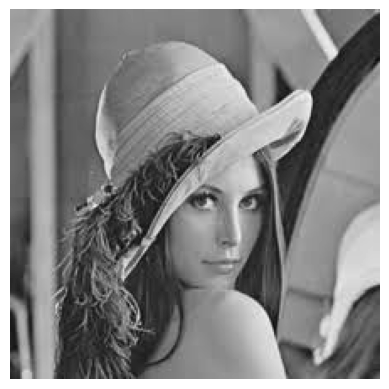

In [1]:
import cv2
import numpy as np
import xlwt
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
img = cv2.imread('lena.jpg',0)
plt.imshow(img,"gray")
plt.axis('off')

(Text(0.5, 0, 'pixel value'), Text(0, 0.5, 'frequency'))

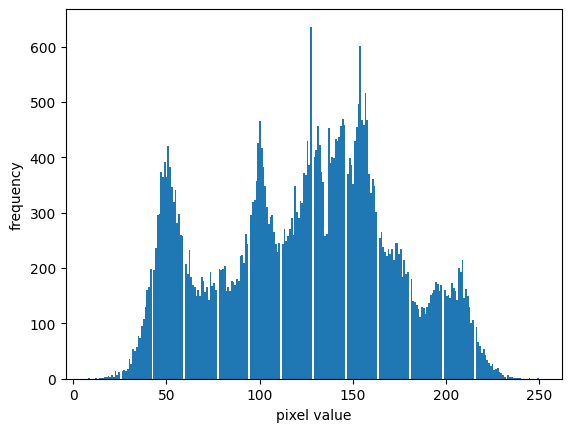

In [2]:
pixel = img.ravel()
pixel_list = np.bincount(pixel, minlength=256)
plt.hist(pixel,bins = 256)
plt.xlabel('pixel value'), plt.ylabel('frequency')

In [64]:
x = np.arange(256)
y = pixel_list
f = interp1d(x, y, kind='cubic')

# 在更密集的x范围内进行插值
x_new = np.linspace(0, 255, 1000)
y_new = f(x_new)

# 将插值结果存储到data中
data = np.column_stack((x_new, y_new))

# 去除值为零的点
data_filtered = data[data[:, 1] >= 0.0001]

In [8]:
data = []
for i in range(256):
    if pixel_list[i]:
        data.append((i, pixel_list[i]))
data_filtered = np.array(data)

def mean_shift(pixel_list, bandwidth):
    data = pixel_list[:, 0]
    centroids = np.copy(data)
    while True:
        distances = np.abs(centroids - centroids[:, np.newaxis])
        weights = np.exp(-0.5 * (distances / bandwidth) ** 2)
        new_centroids = np.sum(pixel_list[:, 1] * centroids[:, np.newaxis] * weights, axis=0) / np.sum(
            pixel_list[:, 1] * weights, axis=0)
        if np.all(np.isclose(new_centroids, centroids, atol=1e-9)):
            break
        centroids = new_centroids
    return np.round(centroids, 3)

cluster_centers = mean_shift(data_filtered, bandwidth= 11)
# 获取聚类中心
cluster_center = np.unique(cluster_centers)
center = list(cluster_center)
print(center)

[43.874, 98.963, 154.81, 210.061]


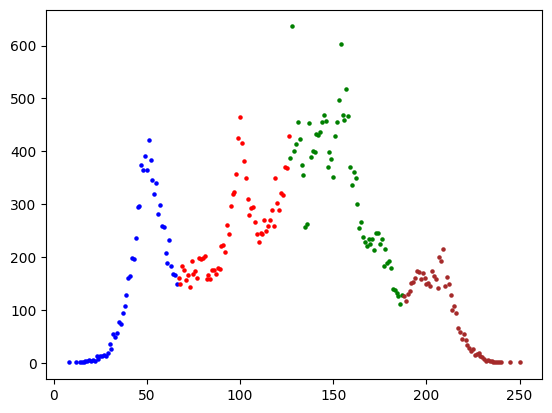

In [9]:
colors = ["blue", "red", "green", "brown", "orange", "yellow", "black"]
k = 0
for i, pixel in data:
    plt.scatter(i, pixel, s=5, color = colors[center.index(cluster_centers[k])])
    k = k + 1